In [1]:

from qiskit import *
from qiskit.visualization import plot_state_city

In [2]:

# Enigme : la porte au trésor
'''
un trésor se cache derrière une des 2 portes
un gardien est devant chaque porte, l'un ment l'autre dit la vérité mais on ne sait pas lequel
La question a poser pour résoudre cette éngime est la suivante :
Quelle porte l'autre gardien me dirait de ne pas prendre ?
'''

"\nun trésor se cache derrière une des 2 portes\nun gardien est devant chaque porte, l'un ment l'autre dit la vérité mais on ne sait pas lequel\nLa question a poser pour résoudre cette éngime est la suivante :\nQuelle porte l'autre gardien me dirait de ne pas prendre ?\n"

/home/duincan/Projects/School/info_q/venv/lib/python3.11/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


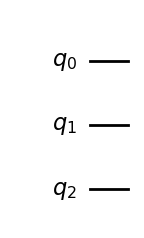

In [3]:
# On commence par implémenter l'énigme de départ
# Création du circuit quantique avec 3 qubits : deux pour les gardiens et un pour indiquer quel gardien ment.

circ = QuantumCircuit(3)
circ.draw('mpl')

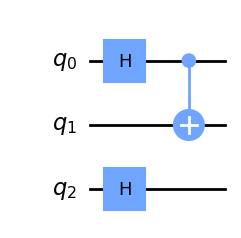

In [4]:
# Application de la porte Hadamard sur les qubits des gardiens pour les mettre en état de superposition.
# Utilisation de la porte CNOT pour intriquer les réponses des gardiens.
# Application de la porte Hadamard sur le qubit du mensonge pour représenter l'incertitude du menteur.

circ.h(0)
circ.cx(0,1)
circ.h(2)
circ.draw('mpl')

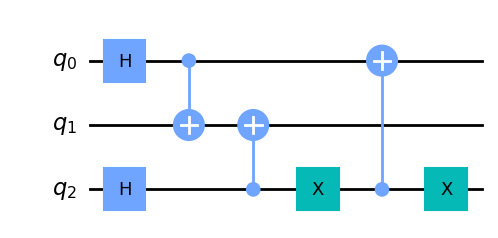

In [6]:
# Création du "circuit de mensonge" : inversion de la réponse du gardien menteur.
# Si q2 est à 1, alors q1 ment ; si q2 est à 0, c'est q0 qui ment.
circ.cx(2,1)
# On inverse la valeur de q2
circ.x(2)
circ.cx(2,0)
# Retour à l'état initial de q2 pour identification.
circ.x(2)
circ.draw('mpl')

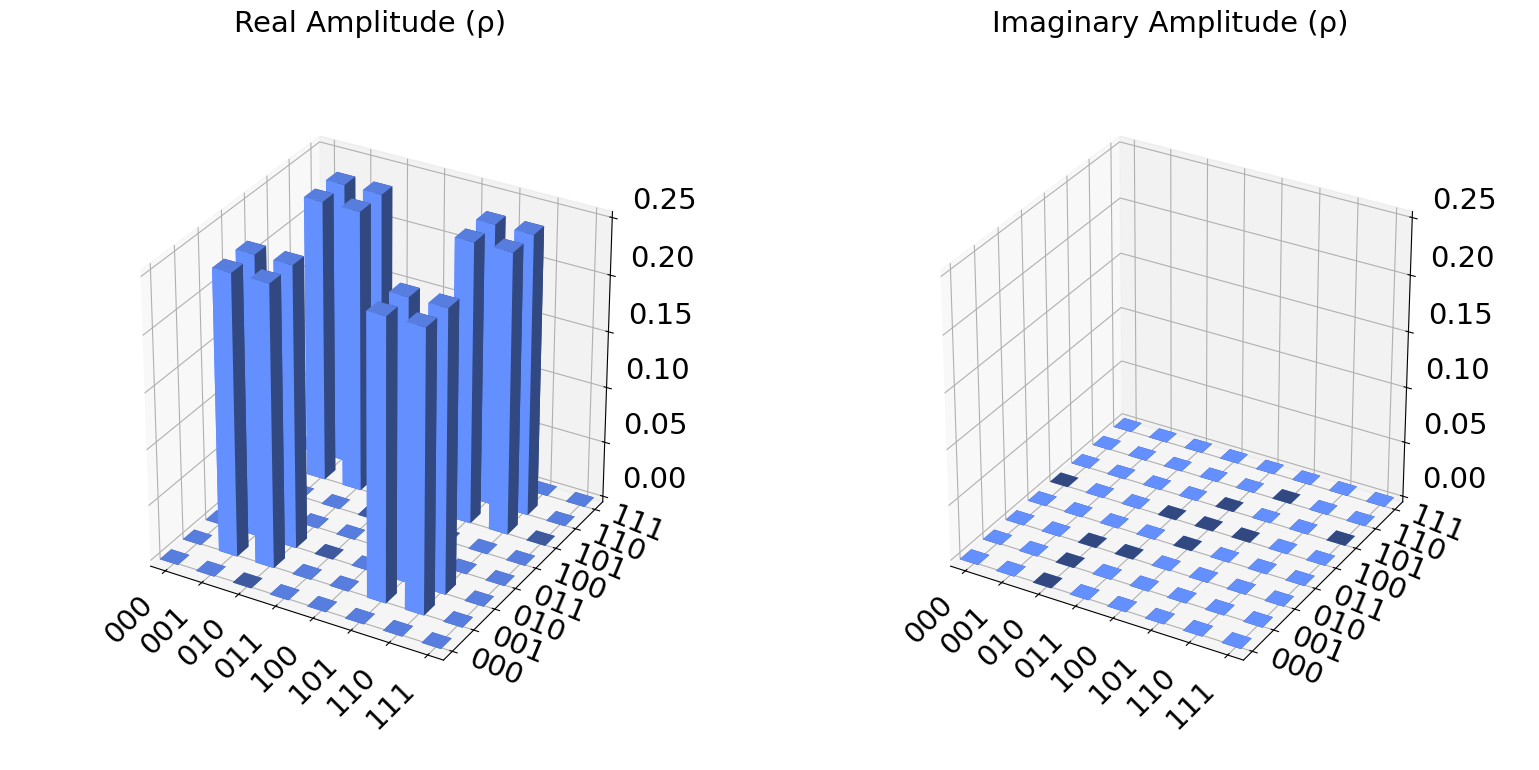

In [7]:
# Simulation de l'état quantique pour visualisation.
backend = Aer.get_backend('statevector_simulator')
job = backend.run(circ)
result = job.result()
outputstate = result.get_statevector(circ, decimals=3)
plot_state_city(outputstate)

# On a 4 possibilités : 2 possbilités pour le trésor * 2 possibilités de mensonge avec 
# un résultat inverse pour les 2 gardiens (q0 et q1)


/home/duincan/Projects/School/info_q/venv/lib/python3.11/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


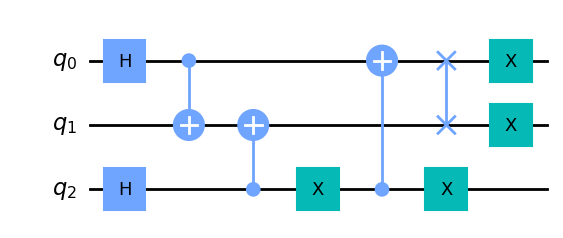

In [8]:
# Maintenant on va implémenter la résolution de l'énigme
# On rappelle la question à poser : Quelle porte l'autre gardien me dirait de ne pas prendre ?
# Résolution de l'énigme : on utilise la porte SWAP pour échanger les réponses des gardiens,
# puis la porte NOT pour déterminer la porte à ne pas choisir.
circ.swap(0, 1)
circ.x(0)
circ.x(1)
circ.draw('mpl')

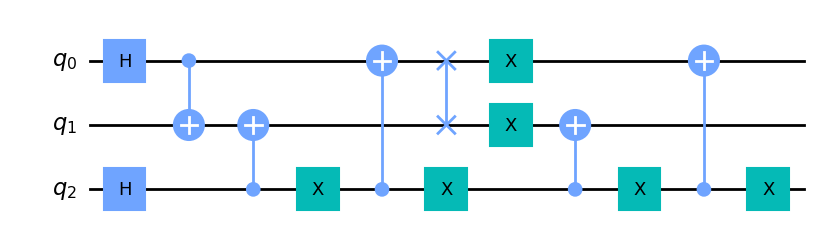

In [10]:
# Le faite de demander au gardien d'interroger l'autre gardien déclenche à nouveau le circuit du mensonge ce qui nous permet au final de l'annuler en l'implémentant une nouvelle fois
circ.cx(2,1)
# On inverse la valeur de q2
circ.x(2)
circ.cx(2,0)
# Annulation du "circuit de mensonge" par réapplication des portes pour obtenir la réponse sincère.
circ.x(2)
circ.draw('mpl')

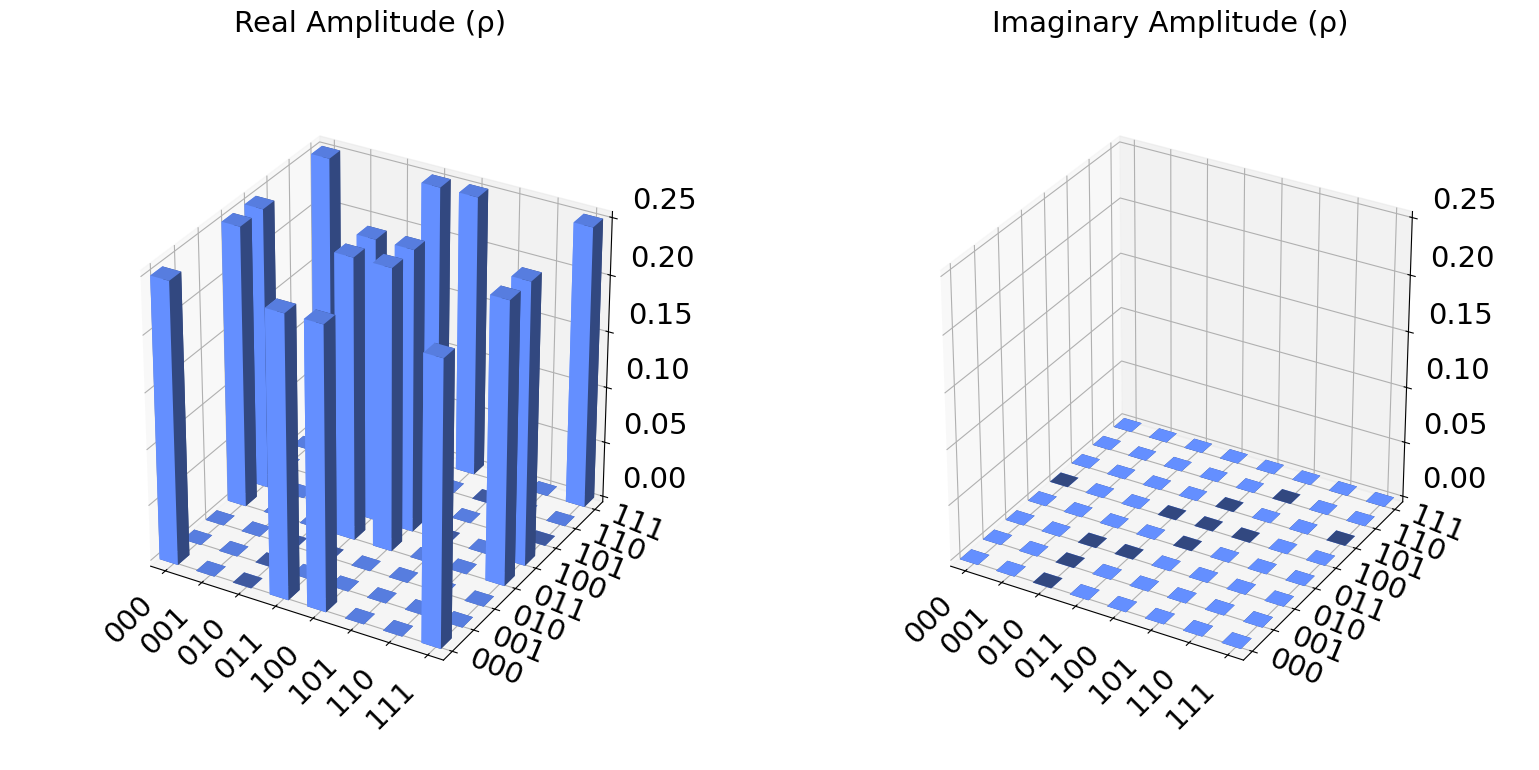

In [11]:
backend = Aer.get_backend('statevector_simulator')
job = backend.run(circ)
result = job.result()
outputstate = result.get_statevector(circ, decimals=3)
plot_state_city(outputstate)
# On a toujours 4 possibilités : 2 possbilités pour le trésor * 2 possibilités de mensonge avec un résultat inverse pour les 2 gardiens (q0 et q1)
# Mais cette fois ci les 2 gardiens q0 et q1 donne le même résultat